## Importando bibliotecas necessárias


In [2]:
import polars as pl
import streamlit as st
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



## Exibindo as primeiras linhas do conjunto de dados
Esta célula usa o método `head()` para exibir as primeiras cinco linhas do conjunto de dados, fornecendo uma visão rápida da estrutura dos dados e de alguns registros de amostra.

In [3]:
data = pd.read_csv("dataset.csv")
data.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


## Exibindo informações do conjunto de dados
O método `info()` é usado aqui para exibir um resumo conciso do conjunto de dados, incluindo o número de valores não nulos e os tipos de dados de cada coluna.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     924 non-null    int64  
 1   Age                         924 non-null    int64  
 2   Gender                      924 non-null    object 
 3   Platform                    924 non-null    object 
 4   Daily_Usage_Time (minutes)  924 non-null    float64
 5   Posts_Per_Day               924 non-null    float64
 6   Likes_Received_Per_Day      924 non-null    float64
 7   Comments_Received_Per_Day   924 non-null    float64
 8   Messages_Sent_Per_Day       924 non-null    float64
 9   Dominant_Emotion            924 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 72.3+ KB


## Obtendo os possíveis valores para o Target

In [5]:
sleep_desorders = data["Dominant_Emotion"].unique()
sleep_desorders

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

## Definindo paleta de cores para o gráfico



In [6]:
color_dict = {'Female': '#e34c42', 'Male': '#4dc471', 'Non-binary': '#3b71db'}
sns.set_palette(list(color_dict.values()))

## Gerando gráficos

Esse gráfico faz um plot da relação do uso diário de redes sociais com a emoção dominante sentida durante o dia


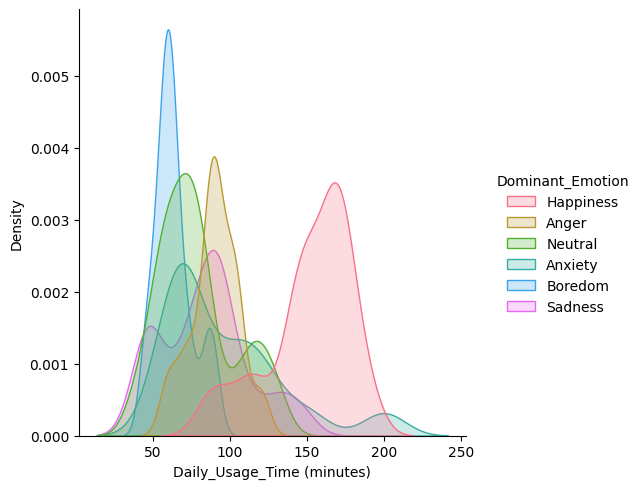

In [7]:
%matplotlib inline

sns.displot(data, x="Daily_Usage_Time (minutes)", hue="Dominant_Emotion", kind="kde", fill=True)
plt.show()


## Definindo outra paleta de cores



In [8]:
color_dict = {'Female': '#e34c42', 'Male': '#4dc471', 'Non-binary': '#3b71db', 'Happiness': '#ffd700', 'Anger': '#ff0000', 'Sadness': '#0000ff', 'Anxiety': '#00ff00', 'Boredom': '#800080', 'Neutral': '#808080'}
sns.set_palette(list(color_dict.values()))


## Gerando gráficos

Esse gráfico faz um plot da relação do gênero e uso das redes sociais com a emoção dominante sentida durante o dia

<Axes: xlabel='Gender', ylabel='count'>

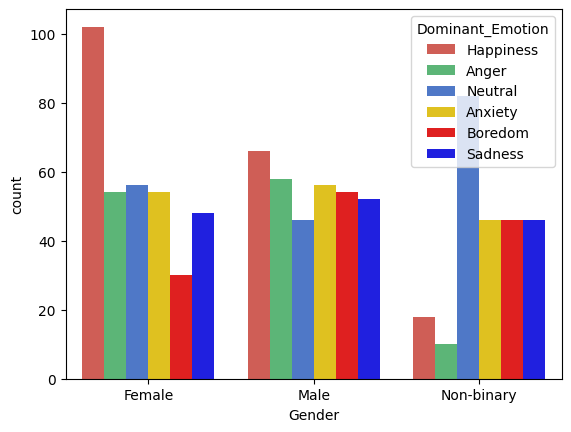

In [9]:
sns.countplot(data=data, x="Gender", hue="Dominant_Emotion")

## Gerando gráficos

Esse gráfico faz um plot da relação do uso de redes sociais com a emoção dominante sentida durante o dia

<Axes: xlabel='Platform', ylabel='count'>

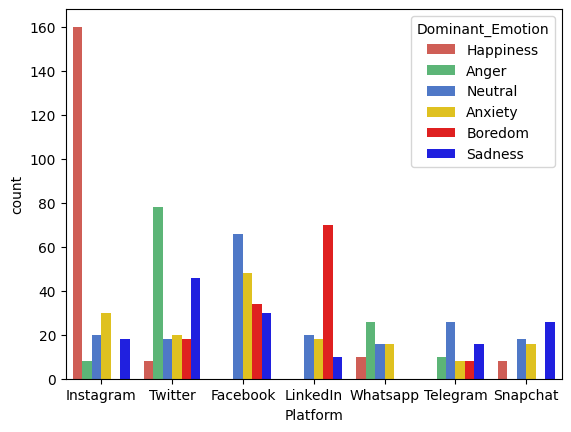

In [10]:
sns.countplot(data=data, x="Platform", hue="Dominant_Emotion")

## Obtendo as porcentagens de cada valor da coluna de Target



In [11]:

data['Dominant_Emotion'].value_counts(normalize=True)

Dominant_Emotion
Happiness    0.201299
Neutral      0.199134
Anxiety      0.168831
Sadness      0.158009
Boredom      0.140693
Anger        0.132035
Name: proportion, dtype: float64

## Definindo as colunas categóricas



In [12]:
categoric_colums = ['Gender', 'Platform']
categoric_colums

['Gender', 'Platform']

## Transformando as colunas categóricas em colunas numéricas usando o método `first`



In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
categoric_data = data[categoric_colums]
data_encoded = pd.DataFrame(encoder.fit_transform(categoric_data).toarray(), columns=encoder.get_feature_names_out(categoric_colums))
final_data = pd.concat([data.drop(categoric_colums, axis=1), data_encoded], axis=1)
final_data



,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,25,120.0,3.0,45.0,10.0,12.0,Happiness,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,30,90.0,5.0,20.0,25.0,30.0,Anger,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,22,60.0,2.0,15.0,5.0,20.0,Neutral,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,28,200.0,8.0,100.0,30.0,50.0,Anxiety,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,33,45.0,1.0,5.0,2.0,10.0,Boredom,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,33,85.0,4.0,35.0,18.0,18.0,Boredom,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
920,997,22,70.0,1.0,14.0,6.0,10.0,Neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,998,35,110.0,3.0,50.0,25.0,25.0,Happiness,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
922,999,28,60.0,2.0,18.0,8.0,18.0,Anger,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Normalizando os dados
 


In [14]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = [
    'Age',
    'Daily_Usage_Time (minutes)',
    'Posts_Per_Day',
    'Likes_Received_Per_Day',
    'Comments_Received_Per_Day',
    'Messages_Sent_Per_Day'
]

scaler = MinMaxScaler()

normalized_data = final_data.copy()
normalized_data[columns_to_normalize] = scaler.fit_transform(normalized_data[columns_to_normalize])
normalized_data

,User_ID,Age,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion,Gender_Male,Gender_Non-binary,Platform_Instagram,Platform_LinkedIn,Platform_Snapchat,Platform_Telegram,Platform_Twitter,Platform_Whatsapp
0,1,0.285714,0.50000,0.285714,0.380952,0.210526,0.095238,Happiness,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.642857,0.31250,0.571429,0.142857,0.605263,0.523810,Anger,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,0.071429,0.12500,0.142857,0.095238,0.078947,0.285714,Neutral,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.500000,1.00000,1.000000,0.904762,0.736842,1.000000,Anxiety,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0.857143,0.03125,0.000000,0.000000,0.000000,0.047619,Boredom,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,996,0.857143,0.28125,0.428571,0.285714,0.421053,0.238095,Boredom,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
920,997,0.071429,0.18750,0.000000,0.085714,0.105263,0.047619,Neutral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
921,998,1.000000,0.43750,0.285714,0.428571,0.605263,0.404762,Happiness,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
922,999,0.500000,0.12500,0.142857,0.123810,0.157895,0.238095,Anger,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


## Separando os dados normalizados
```

In [15]:
X = normalized_data.drop('Dominant_Emotion', axis=1)
y = normalized_data['Dominant_Emotion']

## Dividindo o conjunto de dados em conjuntos de treino e teste
Aqui usamos `train_test_split` do scikit-learn para dividir o conjunto de dados em conjuntos de treino e teste. Isso garante que podemos avaliar o desempenho do modelo em dados não vistos.

In [16]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando diferentes modelos

## Treinando o modelo Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth=7, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)
print("Acurácia de treino: ", model_rf.score(X_train, y_train))
print("Acurácia de validação: ", model_rf.score(X_val, y_val))
print("Acurácia de teste: ", model_rf.score(X_test, y_test))

Acurácia de treino:  0.9904458598726115
Acurácia de validação:  0.9235668789808917
Acurácia de teste:  0.9712230215827338


## Treinando o modelo Decision Tree


In [18]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(max_depth=7, random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_val)
print("Acurácia de treino: ", modelo_dt.score(X_train, y_train))
print("Acurácia de validação: ", modelo_dt.score(X_val, y_val))
print("Acurácia de teste: ", modelo_dt.score(X_test, y_test))

Acurácia de treino:  0.9219745222929936
Acurácia de validação:  0.8152866242038217
Acurácia de teste:  0.9136690647482014


## Treinando o modelo Extra Tree Classifier

In [19]:
from sklearn.tree import ExtraTreeClassifier

modelo_et = ExtraTreeClassifier(max_depth=7, random_state=42, max_features=1231)
modelo_et.fit(X_train, y_train)
Y_pred_et = modelo_et.predict(X_val)
print("Acurácia de treino: ", modelo_et.score(X_train, y_train))
print("Acurácia de validação: ", modelo_et.score(X_val, y_val))
print("Acurácia de teste: ", modelo_et.score(X_test, y_test))



Acurácia de treino:  0.8296178343949044
Acurácia de validação:  0.7515923566878981
Acurácia de teste:  0.8633093525179856


## Treinando o modelo K Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=8)
modelo_knn.fit(X_train, y_train)
y_pred_knn = modelo_knn.predict(X_val)
print("Acurácia de treino: ", modelo_knn.score(X_train, y_train))
print("Acurácia de validação: ", modelo_knn.score(X_val, y_val))
print("Acurácia de teste: ", modelo_knn.score(X_test, y_test))


Acurácia de treino:  0.27229299363057324
Acurácia de validação:  0.03821656050955414
Acurácia de teste:  0.03597122302158273


## Treinando o modelo Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(multi_class='multinomial', random_state=0, max_iter=10000)
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_val)
print("Acurácia de treino: ", modelo_lr.score(X_train, y_train))
print("Acurácia de validação: ", modelo_lr.score(X_val, y_val))
print("Acurácia de teste: ", modelo_lr.score(X_test, y_test))


Acurácia de treino:  0.5812101910828026
Acurácia de validação:  0.5414012738853503
Acurácia de teste:  0.6330935251798561


## Treinando o modelo Ridge 

In [22]:
from sklearn.linear_model import RidgeClassifier

modelo_rc = RidgeClassifier(random_state=0)
modelo_rc.fit(X_train, y_train)
y_pred_rc = modelo_rc.predict(X_val)
print("Acurácia de treino: ", modelo_rc.score(X_train, y_train))
print("Acurácia de validação: ", modelo_rc.score(X_val, y_val))
print("Acurácia de teste: ", modelo_rc.score(X_test, y_test))


Acurácia de treino:  0.5573248407643312
Acurácia de validação:  0.535031847133758
Acurácia de teste:  0.5683453237410072


## Treinando o modelo Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_gb = GradientBoostingClassifier(max_depth=3, random_state=0)
modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_val)
print("Acurácia de treino: ", modelo_gb.score(X_train, y_train))
print("Acurácia de validação: ", modelo_gb.score(X_val, y_val))
print("Acurácia de teste: ", modelo_gb.score(X_test, y_test))


Acurácia de treino:  1.0
Acurácia de validação:  0.9617834394904459
Acurácia de teste:  0.9928057553956835


## Comparando os desempenhos de cada modelo treinado em relação ao score

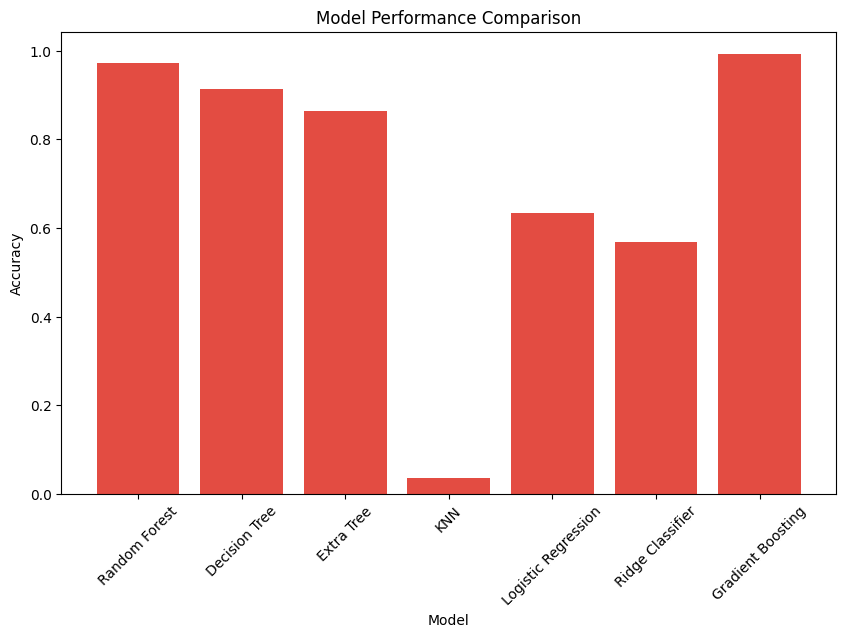

In [24]:
import matplotlib.pyplot as plt

model_names = ['Random Forest', 'Decision Tree', 'Extra Tree', 'KNN', 'Logistic Regression', 'Ridge Classifier', 'Gradient Boosting']
accuracies = [model_rf.score(X_test, y_test), modelo_dt.score(X_test, y_test), modelo_et.score(X_test, y_test), modelo_knn.score(X_test, y_test), modelo_lr.score(X_test, y_test), modelo_rc.score(X_test, y_test), modelo_gb.score(X_test, y_test)]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()

## Fazendo a matriz de confusão para o modelo de melhor score

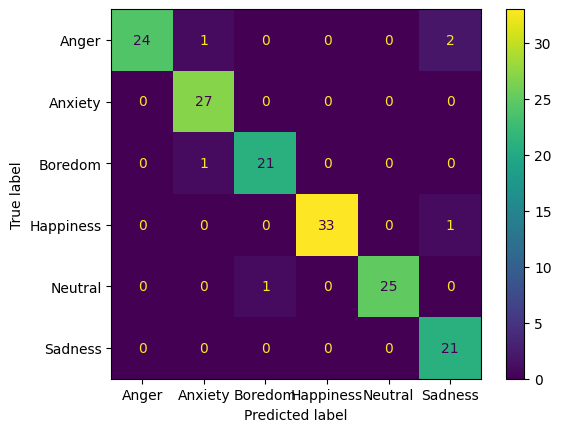

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_val, modelo_gb.predict(X_val))
visualizer = ConfusionMatrixDisplay(conf_matrix, display_labels=modelo_gb.classes_)
visualizer.plot();


# Fazendo a matriz de confusão com a porcentagem


### Note que, em aproximadamente 3% dos casos o modelo confunde `Sadness` com `Hapiness`, como são duas emoções opostas, o objetivo é refinar o modelo para que isso não ocorra

Ele também confunde `Anger` com `Anxiety` e `Sadness`, `Boredom` com `Anxiety` e `Neutral` com `Boredom`. Portanto, é bom refinar o modelo para que não ocorra tanta confusão na interpretação dos dados

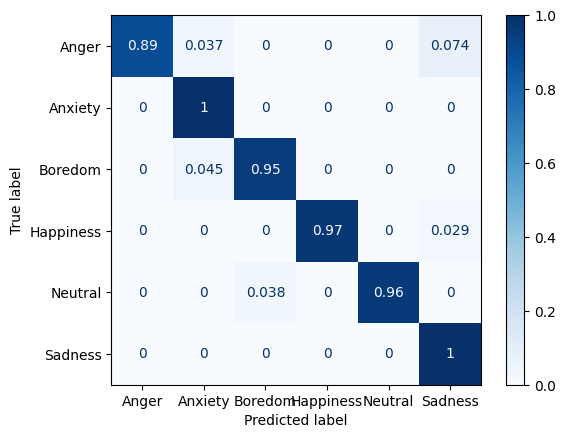

In [26]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_gb, normalize='true', cmap='Blues', display_labels=modelo_gb.classes_);

## Fazendo o classification report

In [27]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred_gb, target_names=modelo_gb.classes_)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

       Anger       1.00      0.89      0.94        27
     Anxiety       0.93      1.00      0.96        27
     Boredom       0.95      0.95      0.95        22
   Happiness       1.00      0.97      0.99        34
     Neutral       1.00      0.96      0.98        26
     Sadness       0.88      1.00      0.93        21

    accuracy                           0.96       157
   macro avg       0.96      0.96      0.96       157
weighted avg       0.97      0.96      0.96       157



## Verificando o balanceamento dos dados

Note que há um pequeno desbalanceamento dos dados de Target


In [28]:
y_train.value_counts()

Dominant_Emotion
Neutral      131
Happiness    119
Sadness      107
Anxiety      103
Boredom       95
Anger         73
Name: count, dtype: int64

## Utilizando o SMOTE para fazer um oversample dos dados para que fique balanceado

Note que após o balanceamento, todos os dados de target possuem a mesma quantidade


In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

y_balanced.value_counts()

Dominant_Emotion
Boredom      131
Happiness    131
Anger        131
Anxiety      131
Neutral      131
Sadness      131
Name: count, dtype: int64

## Treinando o modelo com os dados balanceados

In [30]:
model_gb_balanced = GradientBoostingClassifier(max_depth=3, random_state=0)
model_gb_balanced.fit(X_balanced, y_balanced)
y_pred_gb_balanced = model_gb_balanced.predict(X_val)
print("Acurácia de treino: ", model_gb_balanced.score(X_balanced, y_balanced))
print("Acurácia de validação: ", model_gb_balanced.score(X_val, y_val))
print("Acurácia de teste: ", model_gb_balanced.score(X_test, y_test))

Acurácia de treino:  1.0
Acurácia de validação:  0.9681528662420382
Acurácia de teste:  0.9928057553956835


## Fazendo a matriz de confusão para o modelo com os dados balanceados

Note que o modelo já não confunde mais `Anxiety` com `Boredom`

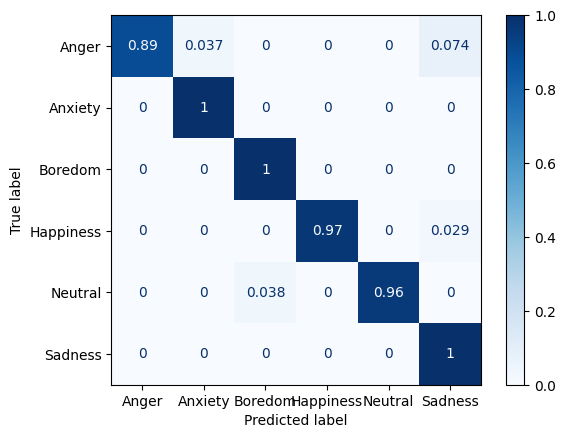

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_gb_balanced, normalize='true', cmap='Blues', display_labels=model_gb_balanced.classes_);

# A partir daqui vamos fazer uma validação cruzada aplicando oversampling


## Para isso, é preciso criar um pipeline para que cada `fold` da validação cruzada tenha o oversampling e que o conjunto de dados de validação não sofra esse mesmo oversampling

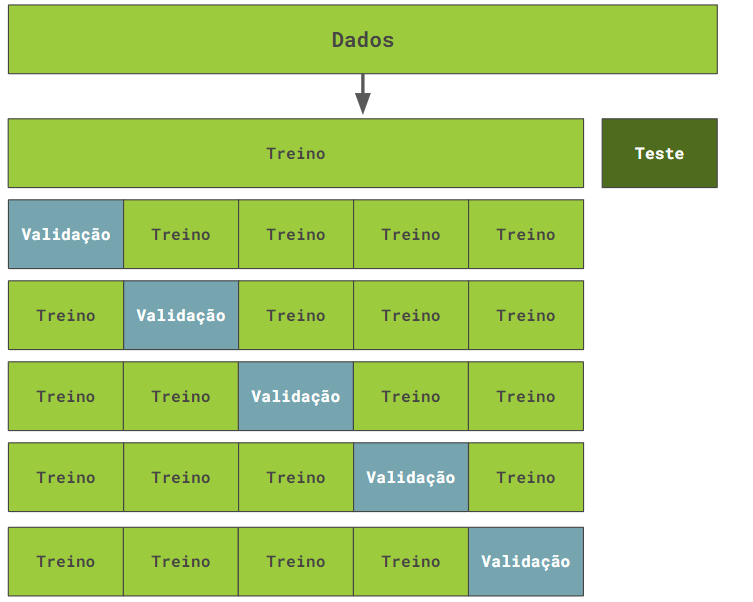

In [32]:
from imblearn.pipeline import Pipeline as imbpipeline 

model = GradientBoostingClassifier(random_state=0, max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE(random_state=0)), ('model', model)])


## Aplicando a validação cruzada e obtendo o score de cada uma

### Qual a importância da validação cruzada?

A validação cruzada ajuda a obter uma estimativa mais precisa do desempenho do modelo ao usar múltiplas divisões dos dados. Isso reduz o viés que pode ocorrer ao usar uma única divisão de treino-teste. Note que todos os scores foram parecidos




In [33]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_results = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted', return_train_score=True)
cv_results['test_score']

array([0.98726115, 0.96178344, 0.94904459, 0.95541401, 0.95541401])

## Obtendo o intervalo de confiança para os modelos

In [34]:
mean = cv_results['test_score'].mean()
std = cv_results['test_score'].std()

print(f'Confidence interval: [{mean - 2*std}, {mean + 2*std}]')

Confidence interval: [0.9350621949510791, 0.9885046840298128]


# Treinando o modelo final

## Para o modelo final utilizei a técnica de oversample `SMOTE` e obtive o `Classification report` e `Matriz de confusão`

Note que o desempenho do modelo foi bem satisfatório, ele apenas confundiu um pouco `Anxiety` com `Happiness` e `Anger` com `Neutral`, o que pode ser preocupante pois essas emoções são opostas


              precision    recall  f1-score   support

       Anger       0.96      1.00      0.98        22
     Anxiety       0.96      1.00      0.98        26
     Boredom       1.00      1.00      1.00        13
   Happiness       1.00      0.97      0.98        33
     Neutral       1.00      0.96      0.98        27
     Sadness       1.00      1.00      1.00        18

    accuracy                           0.99       139
   macro avg       0.99      0.99      0.99       139
weighted avg       0.99      0.99      0.99       139



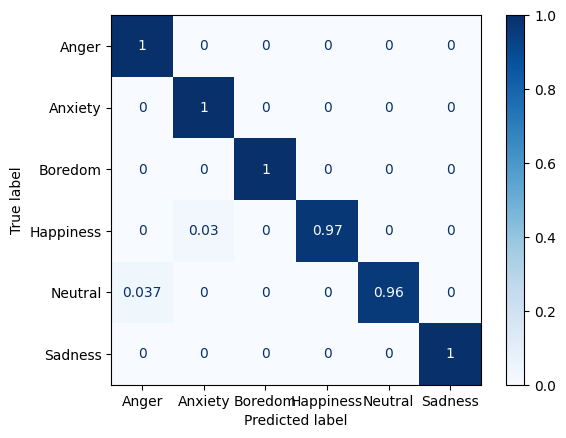

In [35]:
oversample = SMOTE(random_state=0)
X_balanced, y_balanced = oversample.fit_resample(X, y)
model = GradientBoostingClassifier(random_state=0, max_depth=10)
model.fit(X_balanced, y_balanced)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=model_gb_balanced.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues', display_labels=model_gb_balanced.classes_);


# Aplicando otimização de de hiperparâmetros (`Otimização Bayesiana`)

Estou utilizando a otimização bayesiana para ajustar os hiperparâmetros do meu modelo devido à sua eficiência e inteligência na busca dos melhores parâmetros. A otimização bayesiana é capaz de explorar o espaço de hiperparâmetros de forma mais rápida e eficaz em comparação com métodos tradicionais, como a busca em grade (grid search) ou a busca aleatória (random search). Isso permite encontrar combinações ideais de parâmetros com menos iterações, economizando tempo e recursos computacionais.

In [36]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

param_space_gb = {
    'n_estimators': Integer(50, 300),
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'subsample': Real(0.5, 1.0),
    'max_features': Categorical(['sqrt', 'log2', None])
}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

X_balanced, y_balanced = oversample.fit_resample(X, y)

opt_gb = BayesSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                       search_spaces=param_space_gb,
                       n_iter=50,
                       cv=inner_cv,
                       scoring='recall_weighted',
                       n_jobs=-1,
                       random_state=0)

gb_nested_scores = cross_validate(opt_gb, X=X_balanced, y=y_balanced, cv=outer_cv, scoring='recall_weighted', return_train_score=True)




## Valores de score obtidos para a validação cruzada aninhada

In [37]:
print(f'Score results: {gb_nested_scores["test_score"]}')
print(f'Mean: {gb_nested_scores["test_score"].mean()}')

Score results: [0.97354497 0.96825397 0.96808511 0.96808511 0.95744681]
Mean: 0.9670831926151076


## Dando fit no modelo, obtendo os melhores parâmetros e o melhor score

In [38]:
opt_gb.fit(X_balanced, y_balanced)

print(f'Best params: {opt_gb.best_params_}')
print(f'Best score: {opt_gb.best_score_}')


Best params: OrderedDict([('learning_rate', 0.1322550697468573), ('max_depth', 4), ('max_features', 'log2'), ('min_samples_leaf', 19), ('min_samples_split', 2), ('n_estimators', 300), ('subsample', 0.6628338917944778)])
Best score: 0.9670775638860745


## Obtendo o `classification report` e a `matriz de confusão` para o modelo

Note que aplicando a otimização bayesiana o desempenho do modelo melhora

              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00        22
     Anxiety       1.00      0.96      0.98        26
     Boredom       0.93      1.00      0.96        13
   Happiness       1.00      1.00      1.00        33
     Neutral       1.00      1.00      1.00        27
     Sadness       1.00      1.00      1.00        18

    accuracy                           0.99       139
   macro avg       0.99      0.99      0.99       139
weighted avg       0.99      0.99      0.99       139



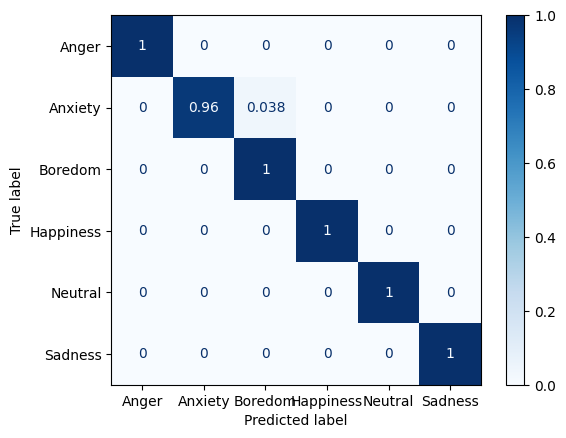

In [39]:
y_pred = opt_gb.predict(X_test)
print(classification_report(y_test, y_pred, target_names=model_gb_balanced.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', cmap='Blues', display_labels=model_gb_balanced.classes_);

## Observando como o `Score` varia com o parâmetro de `Max Depth`

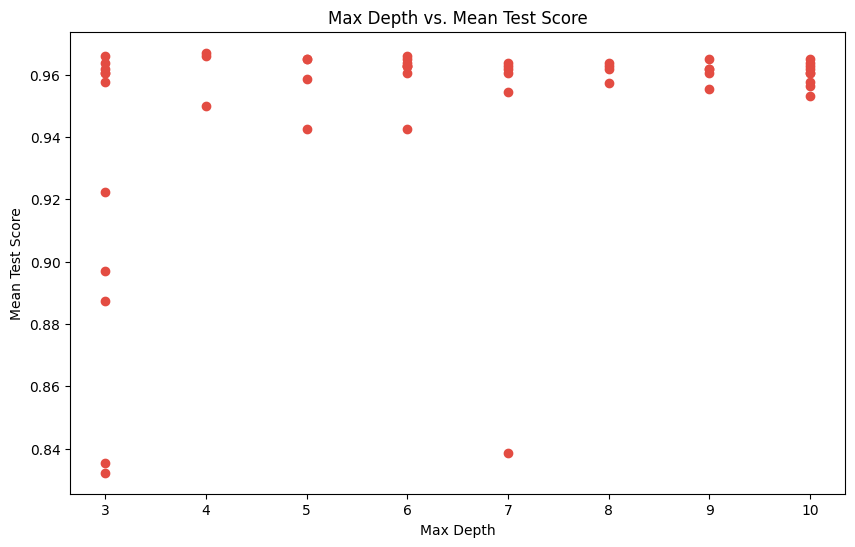

In [40]:
df_results = pd.DataFrame(opt_gb.cv_results_)

plt.figure(figsize=(10, 6))
plt.scatter(
    df_results['param_max_depth'],
    df_results['mean_test_score'],
)

plt.title('Max Depth vs. Mean Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.show()